In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd

# Active learning

In [2]:
# read results
eval_path = "/home/xianglin/projects/DVI_data/active_learning/random/resnet18/feedback.xlsx"
df = pd.read_excel(eval_path, index_col=0, dtype={"task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})

## feedback

In [3]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.tolerance==0.0)]

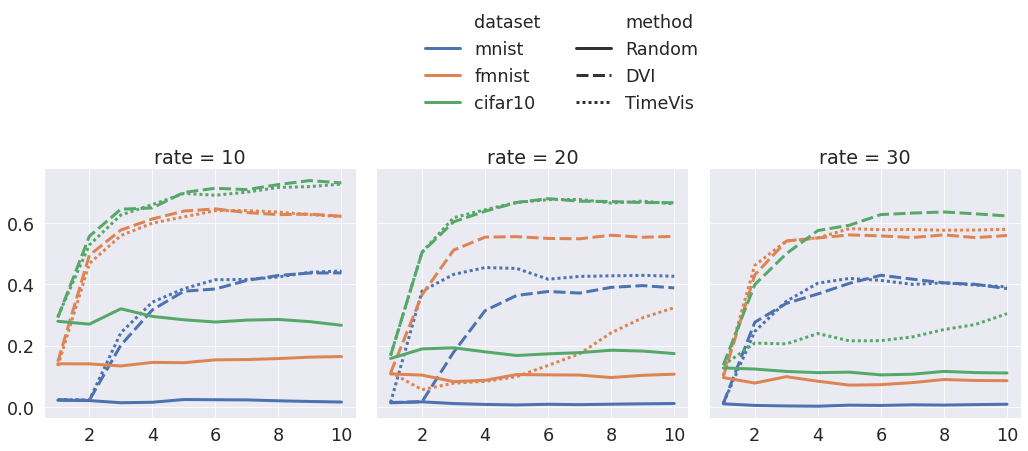

In [4]:
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="rate", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

## noise

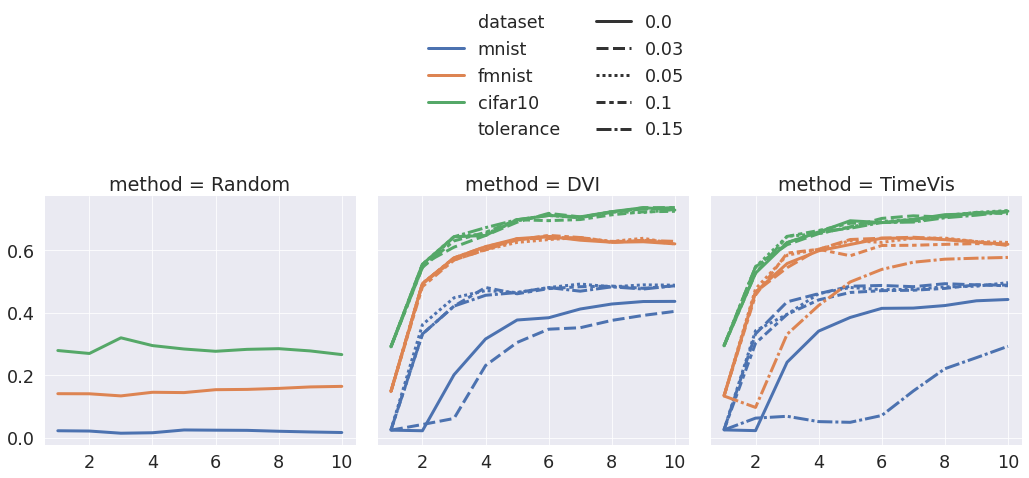

In [5]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==10)]
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_noise_10.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

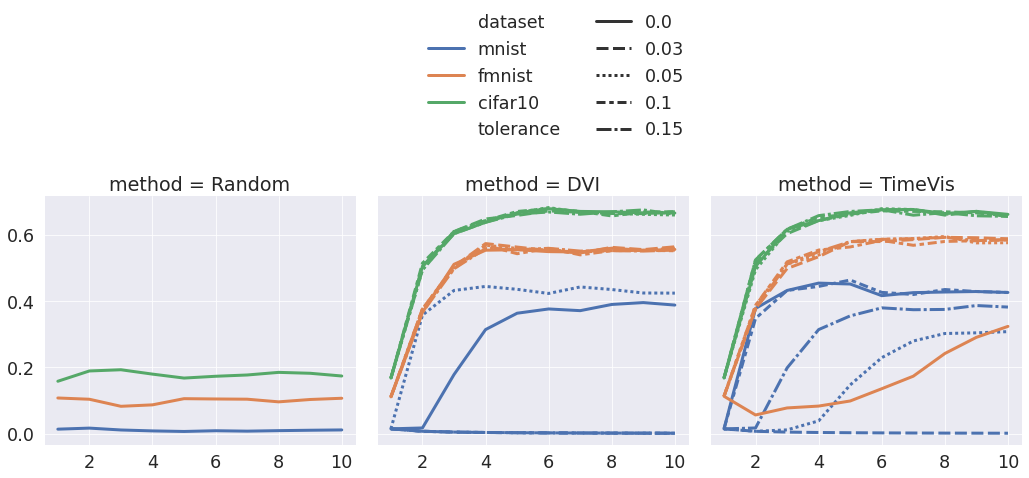

In [6]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==20)]
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_noise_20.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

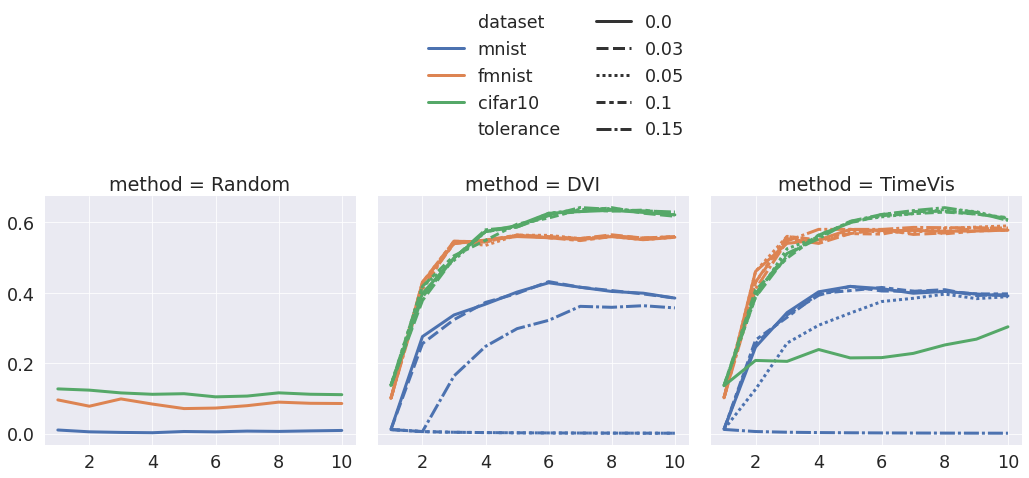

In [7]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==30)]
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_noise_30.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

## efficiency
box plot

In [8]:
df_eval = df[(df.task=="efficiency")]

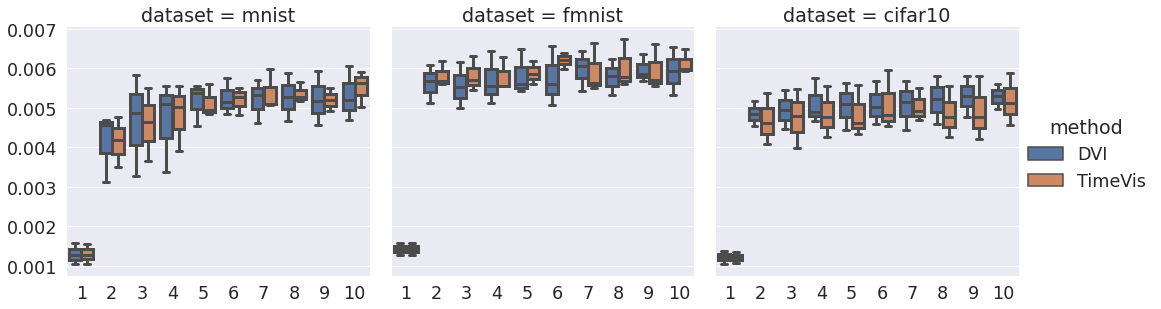

In [9]:
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.catplot(data=df_eval, x="iter", y="eval", col="dataset", hue="method", kind="box")
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_efficiency.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

# NOISE

In [10]:
# read results
eval_path = "/home/xianglin/projects/DVI_data/noisy/symmetric/feedback.xlsx"
df = pd.read_excel(eval_path, index_col=0, dtype={"task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})

## feedback

In [11]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float
df_eval = df[(df.task=="feedback")&(df.tolerance==0.0)]

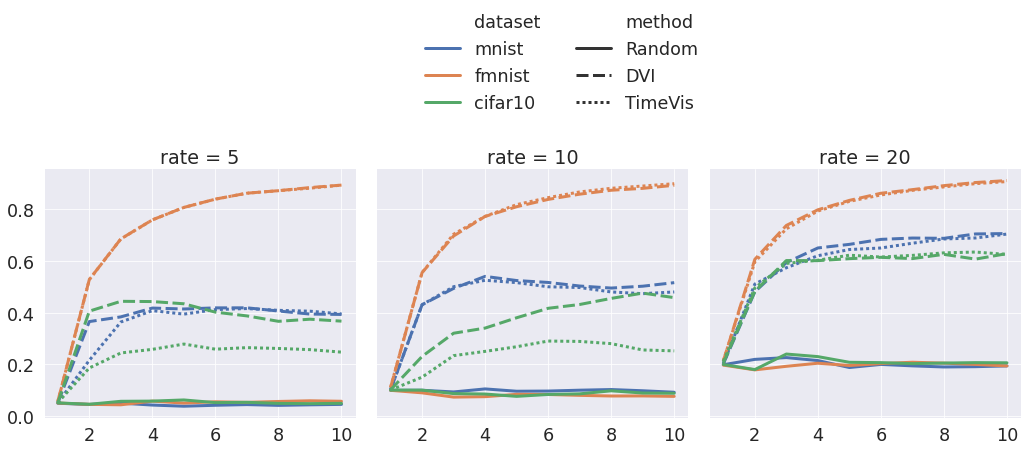

In [12]:
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="rate", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["Random", "DVI", "TimeVis"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

## efficiency

In [13]:
# # "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float
# df_eval = df[(df.task=="efficiency")&(df.rate==20)]
df_eval = df[(df.task=="efficiency")]

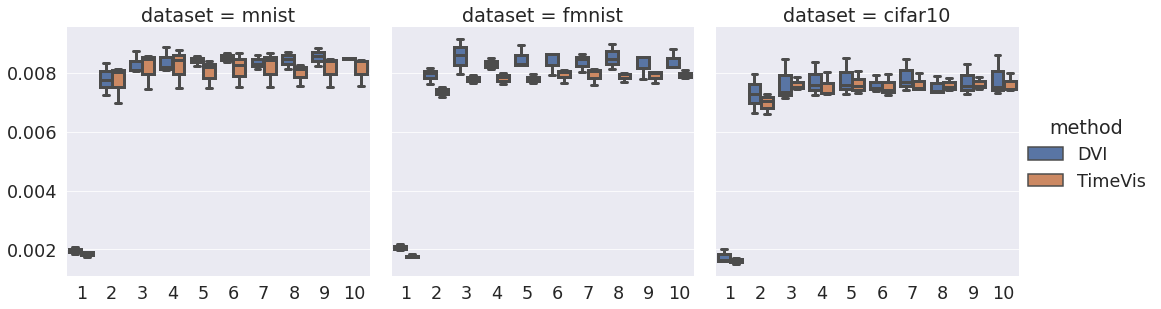

In [14]:
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.catplot(data=df_eval, x="iter", y="eval", col="dataset", hue="method", kind="box")
# fg = sns.relplot(data=df, x="iter", y="eval", col="method", hue="dataset", hue_order=["MNIST","FMNIST","CIFAR10"], kind="line", legend="full")
# fg = sns.lineplot(data=df, x="iter", y="eval", hue="dataset", hue_order=["MNIST","FMNIST","CIFAR10"], style="method", style_order=["DVI", "TimeVis","RANDOM"], legend="full")
# sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_efficiency.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

## noise

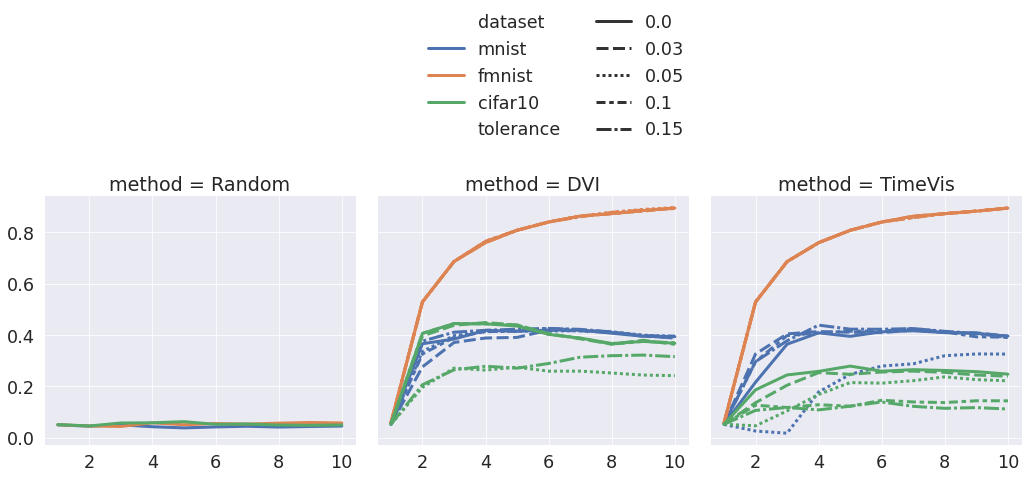

In [15]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==5)]
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_noise_5.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

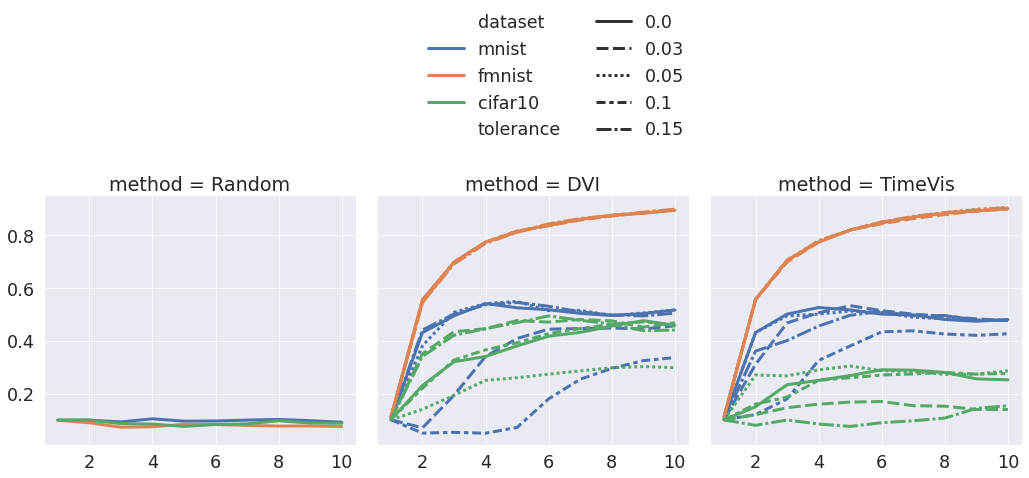

In [16]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==10)]
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_noise_10.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

In [17]:
# "task":str, "dataset":str, "method":str, "rate":int, "tolerance":float, "iter":int, "eval":float})
df_eval = df[(df.task=="feedback")&(df.rate==20)]

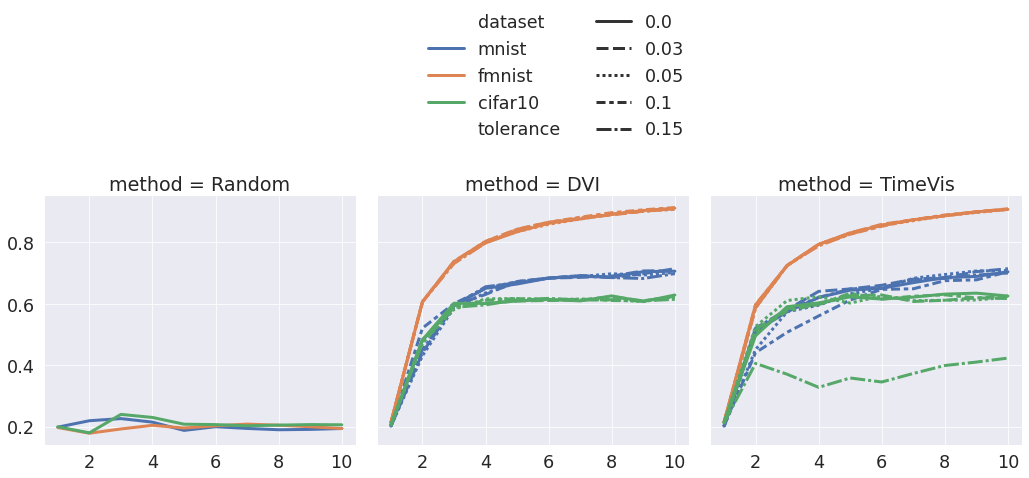

In [18]:
pal20c = sns.color_palette('tab20c', 20)
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.relplot(data=df_eval, x="iter", y="eval", col="method", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="tolerance", kind="line", legend="full")
# fg = sns.lineplot(data=df_eval, x="iter", y="eval", hue="dataset", hue_order=["mnist","fmnist","cifar10"], style="method", style_order=["DVI", "TimeVis","Random"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
fg.set(xlabel='', ylabel='')
fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_noise_20.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)